In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [54]:
#Importing libraries
import pandas as pd                    # For handling data
import numpy as np                     # For numerical operations
import matplotlib.pyplot as plt        # For visualizing plots
import seaborn as sns                  # For better-looking visualizations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


#Load the dataset
df = pd.read_csv('/kaggle/input/insurance/insurance.csv')
print("Column names:", df.columns)
print(df.head())

Column names: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [55]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [56]:
#Missing values in each column
print(df.isnull().sum())

#Remove rows with missing values
df = df.dropna() 
df.reset_index(drop=True, inplace=True)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


None Found

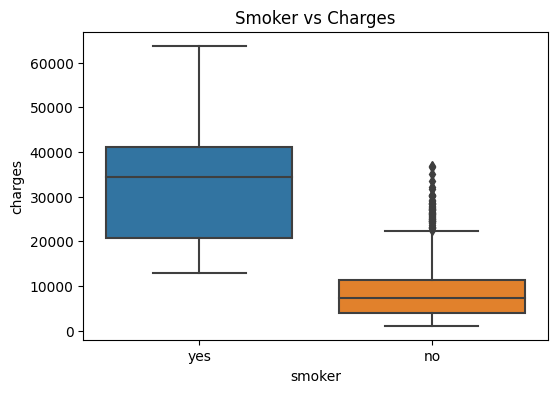

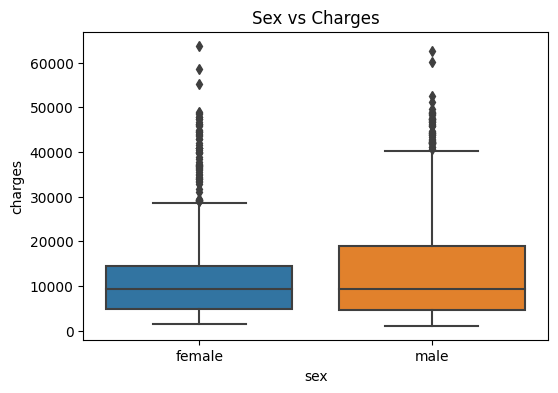

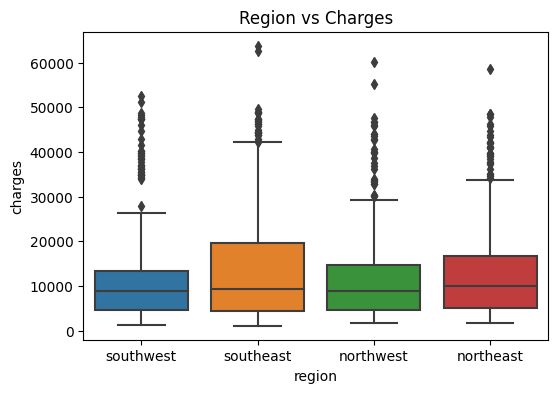

In [57]:
#understanding the charges per category
plt.figure(figsize=(6, 4))
sns.boxplot(x="smoker",y="charges",data=df)
plt.title("Smoker vs Charges")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x="sex",y="charges",data=df)
plt.title("Sex vs Charges")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(x="region",y="charges",data=df)
plt.title("Region vs Charges")
plt.show()

In [58]:
print(df.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [59]:
#converting text into numeric 
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

In [60]:
#features
X = df_encoded.drop("charges", axis=1)
#target
y = df_encoded["charges"]

# spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [61]:
#Scale Dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
#Train model
model = RandomForestRegressor(random_state=69)
model.fit(X_train_scaled, y_train)

#evaluate the model
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)

print("R² score on dataset:", r2)

R² score on test set: 0.8256628475480411


SUMMARY

Cleaned the dataset, performed EDA, encoded categorical variables, and scaled features. Then trained Random Forest Regressor to predict charges and evaluated it using R² score.


Random Forest Regressor is used because it's accurate, handles complex data well, and needs little tuning.

In [81]:
#BONUS
fi = pd.Series(model.feature_importances_, index=X.columns)
top_3 = fi.nlargest(3)  
print("Top 3 features selected :")
print(top_3)

Top 3 features selected :
smoker_yes    0.614033
bmi           0.208765
age           0.132617
dtype: float64


In [80]:
#spliting
X_top3 = X[list(top_3.index)]
X_top3_train, X_top3_test, y_train_3, y_test_3 = train_test_split(X_top3, y, test_size=0.2, random_state=69)

In [74]:
#scaling the dataset
X_top3_train_scaled = scaler.fit_transform(X_top3_train)
X_top3_test_scaled = scaler.transform(X_top3_test)

In [82]:
#Train model
bonusmodel = RandomForestRegressor(random_state=69)
bonusmodel.fit(X_top3_train_scaled, y_train_3)

#evaluate
minimal_predictions = minimal_model.predict(X_top3_test_scaled)
r2_top3 = r2_score(y_test_3, minimal_predictions)

print("\n R² score using top 3 features:", r2_top3)



 R² score using top 3 features: 0.8171160323090063


SUMMARY

*Inference: There is only very slight difference in the accuracy 
The top 3 feature selection makes the model simpler, faster, and yet still very accurate 


Random Forest Regressor is accurate and helps understand which features matter the most, which is why its best for this task.


*Justification: Why these 3 features?

age: Older people generally have higher medical costs.

bmi: High BMI often indicates obesity, raising health risks.

smoker: Smoking leads to serious health issues, increasing charges.


*Random Forest Regression is well-suited for predicting medical insurance charges because:

Handles non-linear relationships: It captures complex patterns between features like age, BMI, and smoking status.

Robust to outliers: It doesn’t get thrown off by extreme insurance charges.

Reduces overfitting: By averaging many decision trees, it gives more stable and accurate predictions.

Feature importance: It helps identify which factors contribute most to insurance costs.